# 데이터셋 읽고 구조 확인

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, mean_absolute_error
from sklearn import preprocessing

In [2]:
dummy_data = pd.read_csv('./train-data.csv')
dummy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
Unnamed: 0           6019 non-null int64
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.4+ KB


# 데이터 전처리

### NaN 결측치 제거

In [3]:
# 'New_Price' 칼럼에 결측치가 너무 많으므로 삭제
del dummy_data['New_Price']
del dummy_data['Unnamed: 0']
dummy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
Price                6019 non-null float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [4]:
# NaN 결측치 제거
dummy_data.dropna("index", inplace=True)
dummy_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
Name                 5975 non-null object
Location             5975 non-null object
Year                 5975 non-null int64
Kilometers_Driven    5975 non-null int64
Fuel_Type            5975 non-null object
Transmission         5975 non-null object
Owner_Type           5975 non-null object
Mileage              5975 non-null object
Engine               5975 non-null object
Power                5975 non-null object
Seats                5975 non-null float64
Price                5975 non-null float64
dtypes: float64(2), int64(2), object(8)
memory usage: 606.8+ KB


### 차종(name)을 브랜드만 남기고 제거하기

In [5]:
name_set = set(list(dummy_data['Name']))
len(name_set)

1855

In [6]:
# 차종만 총 1855가지이므로 브랜드만 추출하기

names = list(dummy_data['Name'])

for i in range(len(names)):
    names[i] = (names[i].split(' '))[0]
dummy_data['Name'] = names

name_set = set(list(dummy_data['Name']))
len(name_set)

31

### 단위 제거하기

In [7]:
# 단위(km/kg, CCm bhp) 제거

dummy_data = dummy_data.reset_index(drop=True)
idx = []
for i in range(len(dummy_data)):
    if 'null' in dummy_data['Power'][i]:
        idx.append(i)
        
dummy_data = dummy_data.drop(idx)
dummy_data = dummy_data.reset_index(drop=True)

mileage = list(dummy_data.Mileage)
engine = list(dummy_data.Engine)
power = list(dummy_data.Power)

for i in range(len(dummy_data)):
    mileage[i] = float(mileage[i].split(' ')[0])
    engine[i] = float(engine[i].split(' ')[0])
    power[i] = float(power[i].split(' ')[0])
    
dummy_data.Mileage = mileage
dummy_data.Engine = engine
dummy_data.Power = power

dummy_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [8]:
dummy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 12 columns):
Name                 5872 non-null object
Location             5872 non-null object
Year                 5872 non-null int64
Kilometers_Driven    5872 non-null int64
Fuel_Type            5872 non-null object
Transmission         5872 non-null object
Owner_Type           5872 non-null object
Mileage              5872 non-null float64
Engine               5872 non-null float64
Power                5872 non-null float64
Seats                5872 non-null float64
Price                5872 non-null float64
dtypes: float64(5), int64(2), object(5)
memory usage: 550.6+ KB


### String 데이터 Int형으로 변환

In [9]:
name_set = set(dummy_data['Name'])
print(name_set)

location_set = set(dummy_data['Location'])
print(location_set)

fuel_set = set(dummy_data['Fuel_Type'])
print(fuel_set)

transmission_set = set(dummy_data['Transmission'])
print(transmission_set)

owner_set = set(dummy_data['Owner_Type'])
print(owner_set)

{'Skoda', 'Audi', 'Chevrolet', 'Ambassador', 'Nissan', 'Jaguar', 'ISUZU', 'Isuzu', 'Datsun', 'Mercedes-Benz', 'Force', 'Honda', 'Toyota', 'Fiat', 'Porsche', 'BMW', 'Mitsubishi', 'Ford', 'Maruti', 'Jeep', 'Mini', 'Renault', 'Land', 'Bentley', 'Lamborghini', 'Volvo', 'Tata', 'Mahindra', 'Volkswagen', 'Hyundai'}
{'Kolkata', 'Pune', 'Jaipur', 'Ahmedabad', 'Kochi', 'Mumbai', 'Coimbatore', 'Bangalore', 'Delhi', 'Chennai', 'Hyderabad'}
{'CNG', 'Diesel', 'LPG', 'Petrol'}
{'Automatic', 'Manual'}
{'First', 'Fourth & Above', 'Second', 'Third'}


In [10]:
set_list = [list(name_set), list(location_set), list(fuel_set), list(transmission_set), list(owner_set)]
name_list = ['name_set', 'location_set', 'fuel_set', 'transmission_set', 'owner_set']
for i in range(len(set_list)):
    temp = dict()
    for j in range(len(set_list[i])):
        temp['{}'.format(set_list[i][j])] = j
    globals()['{}_dict'.format(name_list[i])] = temp

In [11]:
dummy_data = dummy_data.replace(name_set_dict)
dummy_data = dummy_data.replace(location_set_dict)
dummy_data = dummy_data.replace(fuel_set_dict)
dummy_data = dummy_data.replace(transmission_set_dict)
dummy_data = dummy_data.replace(owner_set_dict)

In [12]:
dummy_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,18,5,2010,72000,0,1,0,26.60,998.0,58.16,5.0,1.75
1,29,1,2015,41000,1,1,0,19.67,1582.0,126.20,5.0,12.50
2,11,9,2011,46000,3,1,0,18.20,1199.0,88.70,5.0,4.50
3,18,9,2012,87000,1,1,0,20.77,1248.0,88.76,7.0,6.00
4,1,6,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,17.74


# 탐색적 데이터 분석

### 이상치 확인

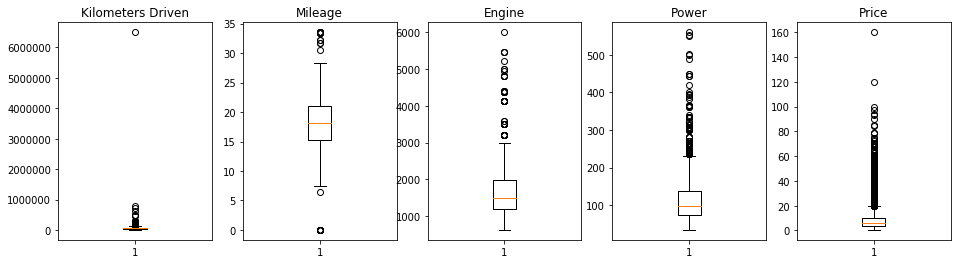

In [13]:
fig, ax = plt.subplots(1, 5, figsize=(16,4))
ax[0].boxplot(list(dummy_data.Kilometers_Driven))
ax[0].set_title("Kilometers Driven")
ax[1].boxplot(list(dummy_data.Mileage))
ax[1].set_title("Mileage")
ax[2].boxplot(list(dummy_data.Engine))
ax[2].set_title("Engine")
ax[3].boxplot(list(dummy_data.Power))
ax[3].set_title("Power")
ax[4].boxplot(list(dummy_data.Price))
ax[4].set_title("Price")
plt.show()

C:\Users\nakhe\Anaconda3\envs\pytorch\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


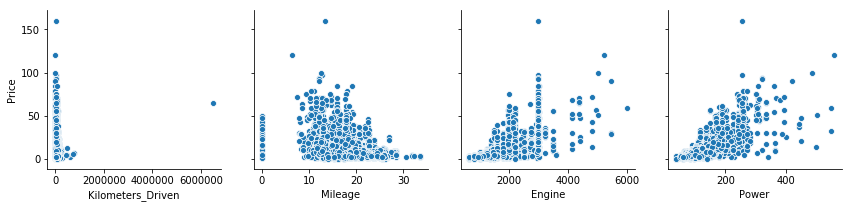

In [14]:
sns.pairplot(data=dummy_data, x_vars=['Kilometers_Driven', 'Mileage', 'Engine', 'Power'], y_vars='Price', size=3)
plt.show()

In [15]:
idx = []
for i in range(len(dummy_data)):
    if dummy_data['Kilometers_Driven'][i] > 2000000:
        idx.append(i)
dummy_data = dummy_data.drop(idx)
dummy_data = dummy_data.reset_index(drop=True)

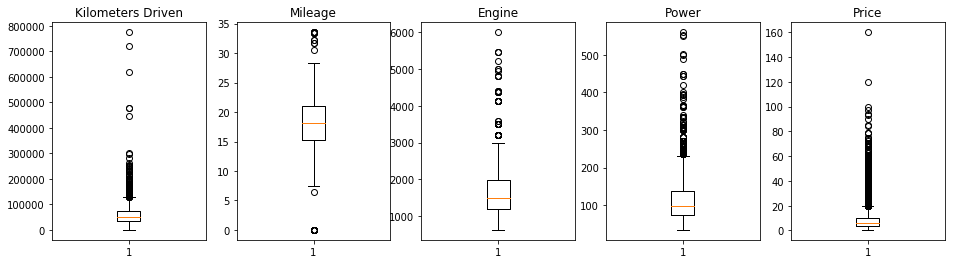

In [16]:
fig, ax = plt.subplots(1, 5, figsize=(16,4))
ax[0].boxplot(list(dummy_data.Kilometers_Driven))
ax[0].set_title("Kilometers Driven")
ax[1].boxplot(list(dummy_data.Mileage))
ax[1].set_title("Mileage")
ax[2].boxplot(list(dummy_data.Engine))
ax[2].set_title("Engine")
ax[3].boxplot(list(dummy_data.Power))
ax[3].set_title("Power")
ax[4].boxplot(list(dummy_data.Price))
ax[4].set_title("Price")
plt.show()

C:\Users\nakhe\Anaconda3\envs\pytorch\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


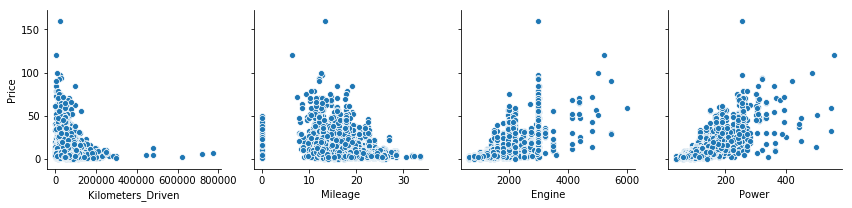

In [17]:
sns.pairplot(data=dummy_data, x_vars=['Kilometers_Driven', 'Mileage', 'Engine', 'Power'], y_vars='Price', size=3)
plt.show()

# 데이터셋 생성

In [18]:
y = dummy_data[['Price']].as_matrix()
del dummy_data['Price']

C:\Users\nakhe\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [19]:
x = dummy_data.values
columns = dummy_data.columns

In [20]:
# Scale
scaler = preprocessing.MinMaxScaler()
tmp = scaler.fit_transform(x)
dummy_data = pd.DataFrame(tmp)
dummy_data.columns = columns
x = dummy_data.as_matrix()

C:\Users\nakhe\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [21]:
x

array([[0.62068966, 0.5       , 0.57142857, ..., 0.06959434, 0.04556866,
        0.375     ],
       [1.        , 0.1       , 0.80952381, ..., 0.17826572, 0.17497147,
        0.375     ],
       [0.37931034, 0.9       , 0.61904762, ..., 0.10699665, 0.10365158,
        0.375     ],
       ...,
       [0.93103448, 0.2       , 0.66666667, ..., 0.34871604, 0.14796501,
        0.75      ],
       [0.62068966, 0.        , 0.71428571, ..., 0.06959434, 0.06257132,
        0.375     ],
       [0.06896552, 1.        , 0.61904762, ..., 0.05805731, 0.04450361,
        0.375     ]])

In [22]:
y

array([[ 1.75],
       [12.5 ],
       [ 4.5 ],
       ...,
       [ 2.9 ],
       [ 2.65],
       [ 2.5 ]])

In [23]:
# Data Split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.85, random_state=1)

C:\Users\nakhe\Anaconda3\envs\pytorch\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


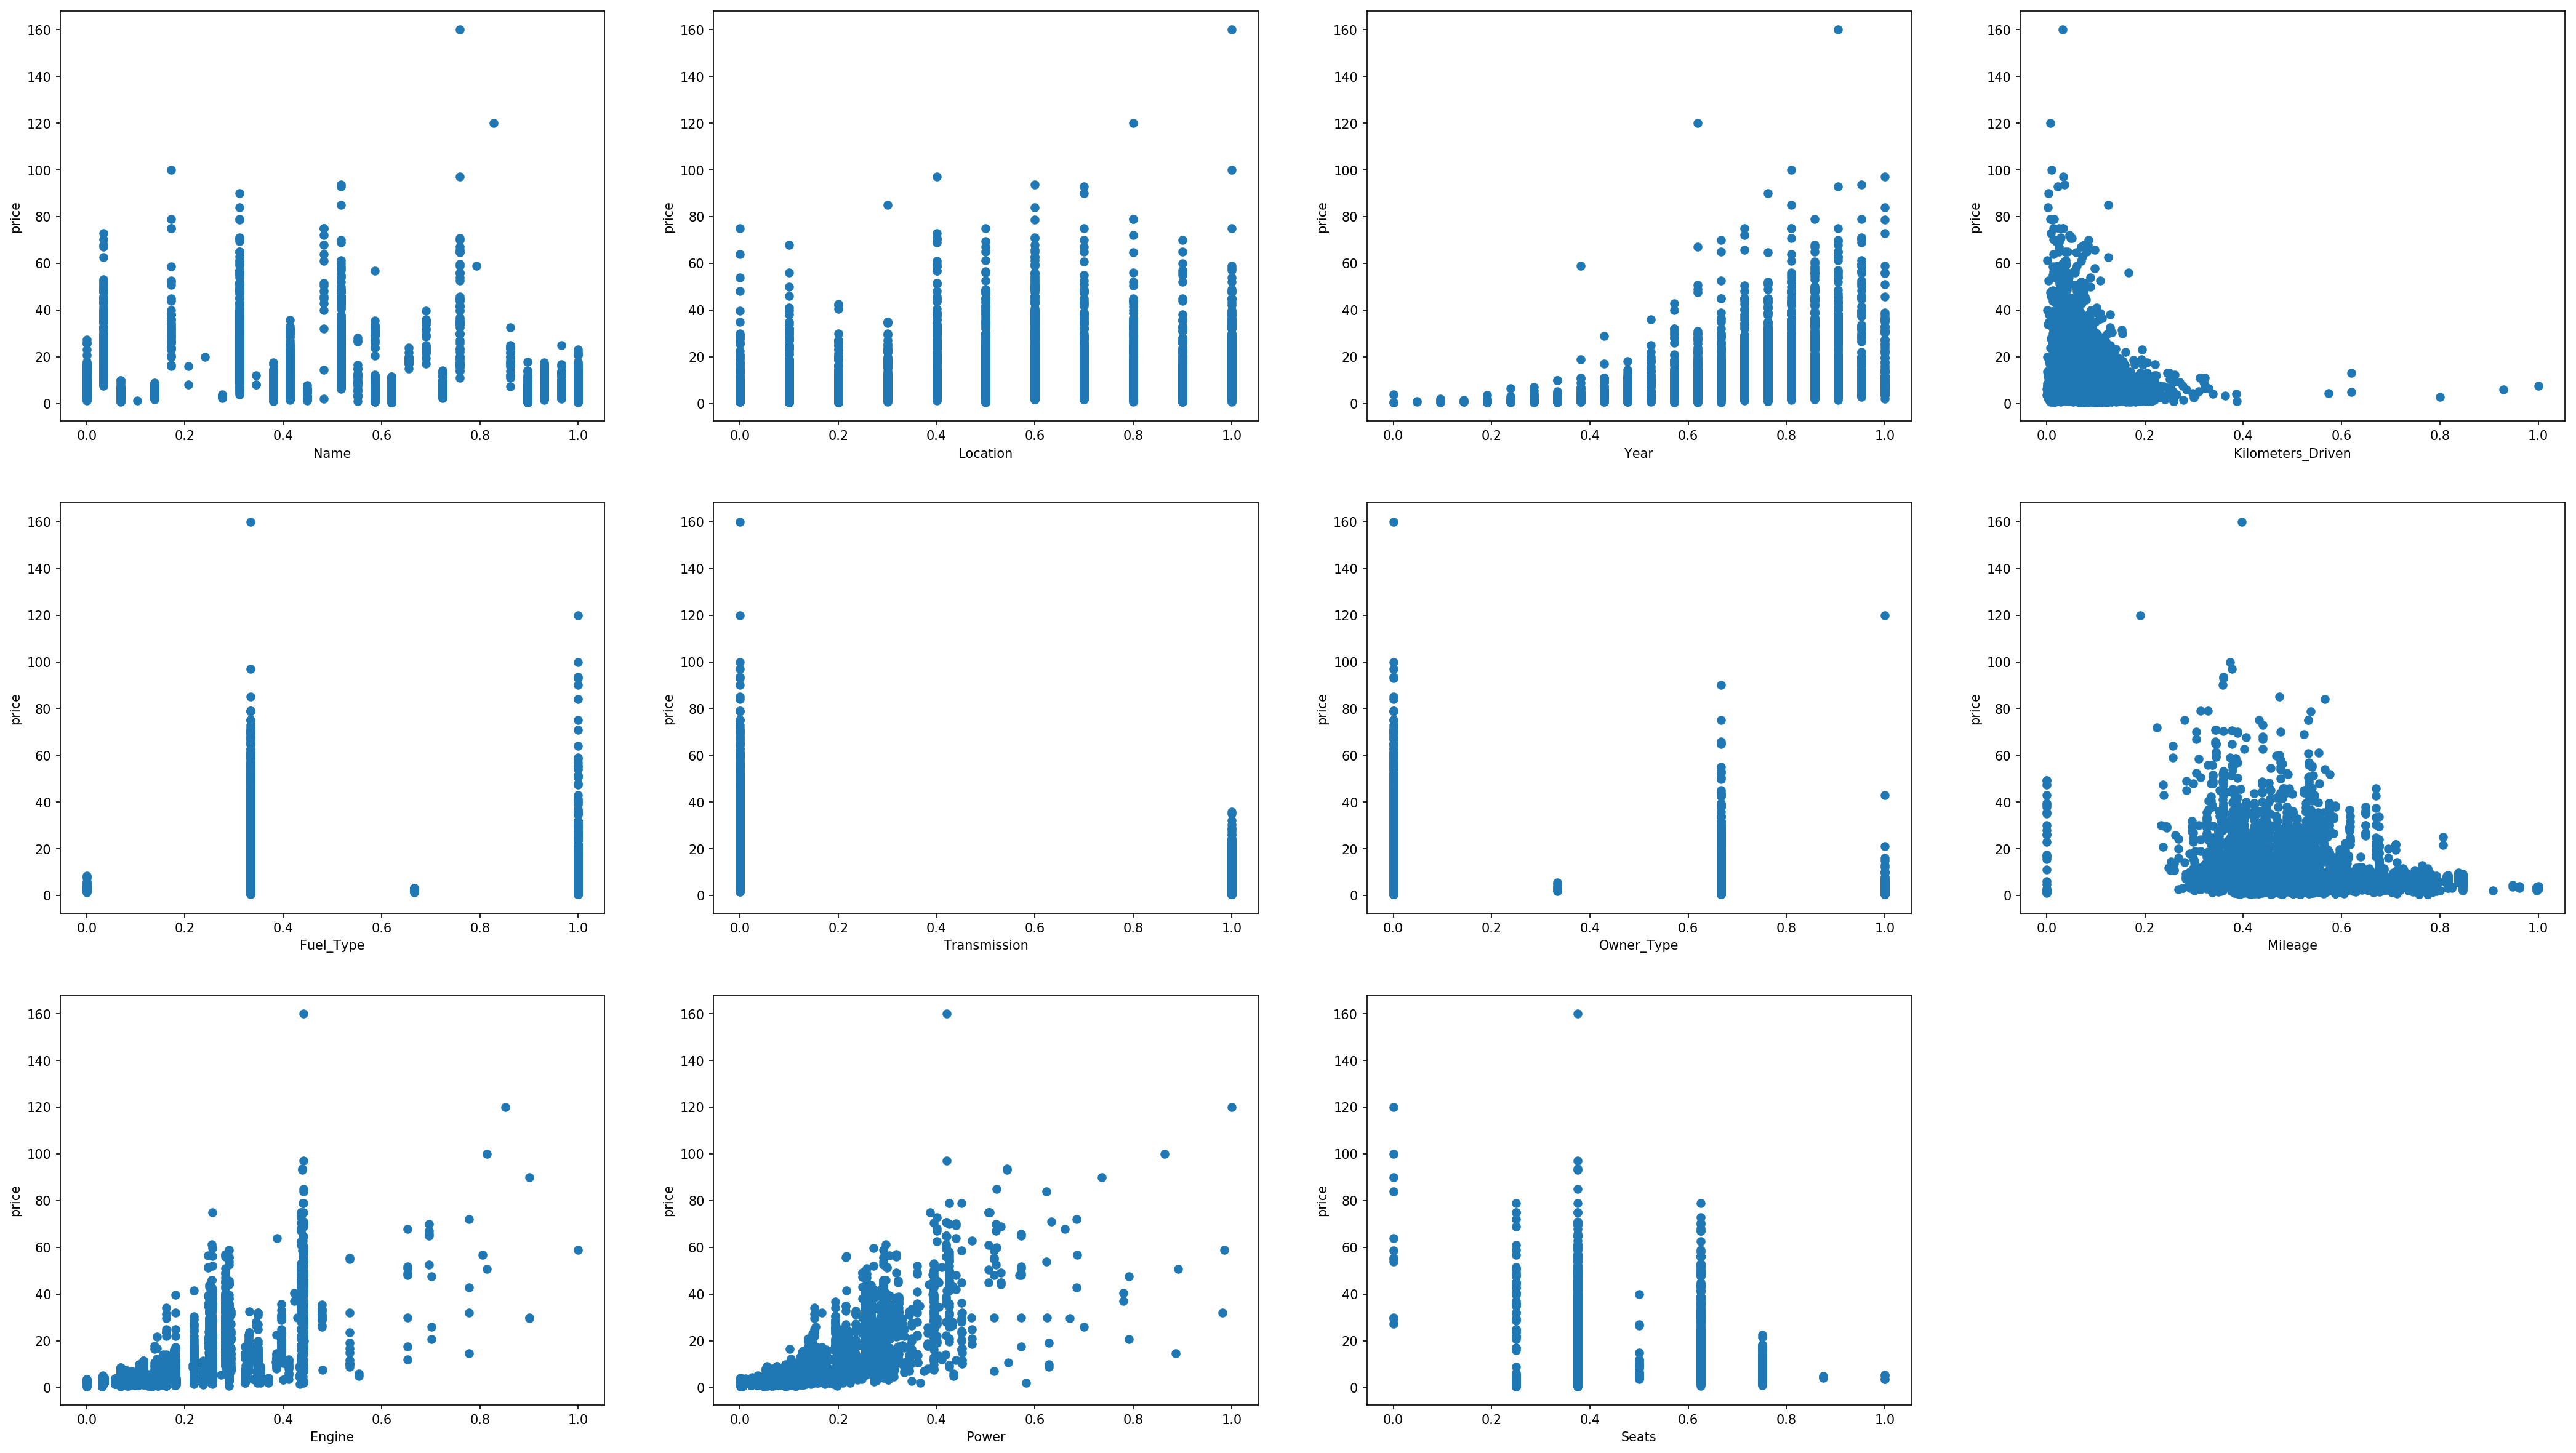

In [24]:
count = 1
plt.figure(figsize=(35,20), dpi=150)
for item in list(dummy_data.columns):
    if item!='Price':
        plt.subplot(3,4,count)
        plt.xlabel(item)
        plt.ylabel('price')
        plt.scatter(dummy_data[item], y)
    count += 1
plt.show()

# 모델링

In [25]:
# 모델링: 다중 선형회귀 사용
lr = LinearRegression(fit_intercept=True, normalize=True, copy_X=True)
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

# 결과 확인

In [26]:
# Train Data 정확도 측정
print("Train Data's Accuracy: ", format(lr.score(X_train, y_train)))

Train Data's Accuracy:  0.7052220495379224


In [27]:
y_predict = lr.predict(X_test)

In [28]:
# Test Data 정확도 측정
print("Test Data's Accuracy: ", format(lr.score(X_test, y_test)))
print("Test Data's Accuracy: ", format(r2_score(y_test, y_predict)))

Test Data's Accuracy:  0.7088373232653414
Test Data's Accuracy:  0.7088373232653414


In [29]:
mean_absolute_error(y_test, y_predict)

3.525725493220218

# 1차 단항 선형회귀

In [30]:
lr = LinearRegression().fit(X_train, y_train)
print("훈련 정확도:{:.5f}".format(lr.score(X_train, y_train)))
print("테스트 정확도:{:.5f}".format(lr.score(X_test, y_test)))

훈련 정확도:0.70522
테스트 정확도:0.70884


# 1차 다항 선형회귀

In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [32]:
poly_features = PolynomialFeatures(degree=1, include_bias=False)
x = poly_features.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=True)
lr = LinearRegression().fit(X_train, y_train)

print("훈련 정확도:{:.5f}".format(lr.score(X_train, y_train)))
print("테스트 정확도:{:.5f}".format(lr.score(X_test, y_test)))

훈련 정확도:0.70186
테스트 정확도:0.72766


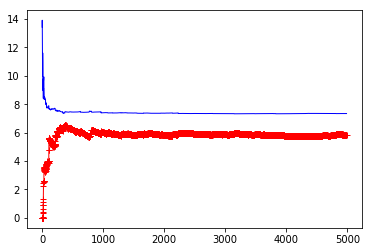

In [33]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, shuffle=True)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=1, label="훈련세트")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=1, label='검증세트')

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=1, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, x, y)

# 2차 다항 선형회귀

In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [35]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x = poly_features.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=True)
lr = LinearRegression().fit(X_train, y_train)

print("훈련 정확도:{:.5f}".format(lr.score(X_train, y_train)))
print("테스트 정확도:{:.5f}".format(lr.score(X_test, y_test)))

훈련 정확도:0.87873
테스트 정확도:0.79379


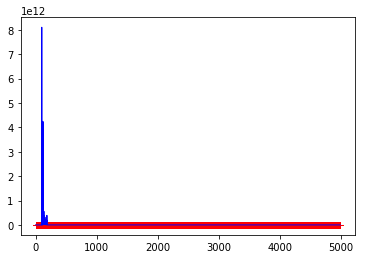

In [36]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, shuffle=True)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=1, label="훈련세트")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=1, label='검증세트')

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=1, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, x, y)

# 3차 다항 선형회귀

In [37]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [38]:
poly_features = PolynomialFeatures(degree=3, include_bias=False)
x = poly_features.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=True)
lr = LinearRegression().fit(X_train, y_train)

print("훈련 정확도:{:.5f}".format(lr.score(X_train, y_train)))
print("테스트 정확도:{:.5f}".format(lr.score(X_test, y_test)))

훈련 정확도:0.99997
테스트 정확도:-246056255159436544.00000


In [ ]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, shuffle=True)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.figure(dpi=150)
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=1, label="훈련세트")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=1, label='검증세트')

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, x, y)